# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeBogota
machine = FakeBogota()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import circs, Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Noise Model

In [3]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [4]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.024 0.10799999999999998
Reverse: 0.024 0.10799999999999998
Original: 0.004 0.039000000000000035
Reverse: 0.004 0.039000000000000035
Original: 0.009000000000000008 0.026
Reverse: 0.009000000000000008 0.026
Original: 0.005 0.03400000000000003
Reverse: 0.005 0.03400000000000003
Original: 0.019 0.135
Reverse: 0.019 0.135


# Variational Form
For Hydrogen

In [5]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [6]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 10000
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_inr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    #print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    noisy_inr = evaluator(circs_inr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True, invert = True)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    return noisy_r, noisy_nr, noisy_inr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    diff_inr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1 = random.uniform(d, u)
        p2 = random.uniform(d, u)
        p3 = random.uniform(d, u)


        noisy_r,noisy_nr, noisy_inr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr, noisy_inr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        diff_inr.append(noisy_inr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        print('Inverted Mitigated diff is ' + str(noisy_inr-ideal))
        
    return energies, diff_r, diff_nr, diff_inr
energies, diff_r, diff_nr, diff_inr = main()

0
Noisy diff is -0.010591064453124965
Mitigated diff is 0.009236614058684367
Inverted Mitigated diff is -0.006959722937652624
1
Noisy diff is -0.006794433593749982
Mitigated diff is -0.000839516013049102
Inverted Mitigated diff is -0.02244556749131943
2
Noisy diff is 0.0993435058593749
Mitigated diff is 0.06445216558011324
Inverted Mitigated diff is 0.02688887130122486
3
Noisy diff is -0.014422851562499991
Mitigated diff is -0.019995347107209377
Inverted Mitigated diff is -0.03244345929677961
4
Noisy diff is 0.11343969726562503
Mitigated diff is 0.034407734219990105
Inverted Mitigated diff is 0.015567196979452858
5
Noisy diff is 0.06771508789062503
Mitigated diff is 0.01009344290149955
Inverted Mitigated diff is -0.008735616927560252
6
Noisy diff is 0.08563623046875007
Mitigated diff is 0.006694117910084729
Inverted Mitigated diff is -0.011868275252308491
7
Noisy diff is -0.08197460937500001
Mitigated diff is -0.04758129525097299
Inverted Mitigated diff is -0.06598788865756638
8
Noisy 

Noisy diff is 0.08815625000000005
Mitigated diff is 0.0355341910151481
Inverted Mitigated diff is -0.007628704772121853
67
Noisy diff is 0.09284570312500001
Mitigated diff is 0.034075745061145524
Inverted Mitigated diff is 0.015301630287030688
68
Noisy diff is 0.11708984375000009
Mitigated diff is 0.039700098431299624
Inverted Mitigated diff is 0.021110843242044375
69
Noisy diff is 0.07279541015625002
Mitigated diff is 0.043247465110843986
Inverted Mitigated diff is -0.0043337314703525975
70
Noisy diff is 0.029135498046875014
Mitigated diff is 0.014951729552999088
Inverted Mitigated diff is -0.035175498774229236
71
Noisy diff is 0.08776684570312504
Mitigated diff is 0.013974214140873076
Inverted Mitigated diff is 0.0002716863597033159
72
Noisy diff is 0.10896386718749995
Mitigated diff is 0.057715334118176864
Inverted Mitigated diff is 0.002110856417887663
73
Noisy diff is 0.02301147460937502
Mitigated diff is 0.0020504227597489544
Inverted Mitigated diff is -0.027090480781154613
74
No

Noisy diff is -0.05464697265624996
Mitigated diff is -0.025034939891922264
Inverted Mitigated diff is -0.0335533770103594
133
Noisy diff is 0.10030175781250006
Mitigated diff is 0.03646810376820275
Inverted Mitigated diff is 0.012886958329199227
134
Noisy diff is 0.05824902343750005
Mitigated diff is -0.000777677617521233
Inverted Mitigated diff is -0.021168153807997525
135
Noisy diff is 0.1488422851562501
Mitigated diff is 0.05719373724149113
Inverted Mitigated diff is 0.03193809525115632
136
Noisy diff is 0.06249316406250005
Mitigated diff is 0.0071120328835660995
Inverted Mitigated diff is -0.009372216200682959
137
Noisy diff is 0.07139355468750003
Mitigated diff is 0.02215780216673091
Inverted Mitigated diff is -0.007136617176290216
138
Noisy diff is 0.09733984375000004
Mitigated diff is 0.026657552381429417
Inverted Mitigated diff is 0.014747906471783367
139
Noisy diff is -0.03826123046875002
Mitigated diff is -0.024698429116516832
Inverted Mitigated diff is -0.04436845226171399
1

Noisy diff is -0.009468750000000005
Mitigated diff is 0.01694801003033425
Inverted Mitigated diff is -0.011792160909836695
199
Noisy diff is 0.07542211914062502
Mitigated diff is 0.010621154084630713
Inverted Mitigated diff is -0.004795695732219163
200
Noisy diff is 0.08795214843749988
Mitigated diff is 0.04480231738960827
Inverted Mitigated diff is 0.017363072463560614
201
Noisy diff is 0.09761596679687479
Mitigated diff is 0.04202472408234115
Inverted Mitigated diff is 0.016527043984661094
202
Noisy diff is -0.027908203124999975
Mitigated diff is -0.0007301827566963959
Inverted Mitigated diff is -0.044005396431910065
203
Noisy diff is 0.00463891601562505
Mitigated diff is 0.008073615761408748
Inverted Mitigated diff is 0.0006618941496871478
204
Noisy diff is 0.08351489257812494
Mitigated diff is 0.036086587468521
Inverted Mitigated diff is 0.0005244385063719603
205
Noisy diff is 0.11950732421874999
Mitigated diff is 0.05325244337368362
Inverted Mitigated diff is 0.018971701898363946


Noisy diff is 0.07898315429687502
Mitigated diff is 0.019676428316567962
Inverted Mitigated diff is -0.004280726781898669
265
Noisy diff is 0.1487062988281248
Mitigated diff is 0.07674476184348844
Inverted Mitigated diff is 0.03167186444740144
266
Noisy diff is 0.02250976562500001
Mitigated diff is 0.01873043321695661
Inverted Mitigated diff is -0.01105735677083336
267
Noisy diff is -0.0009035644531250608
Mitigated diff is 0.015044102875475085
Inverted Mitigated diff is -0.014621057705792417
268
Noisy diff is 0.06212060546874998
Mitigated diff is 0.03925385616987176
Inverted Mitigated diff is 0.007889997806013294
269
Noisy diff is -0.010726806640625003
Mitigated diff is -0.004971246315533473
Inverted Mitigated diff is -0.021369613015792932
270
Noisy diff is 0.13823559570312494
Mitigated diff is 0.046066067184017845
Inverted Mitigated diff is 0.030323323090754695
271
Noisy diff is 0.004616210937500004
Mitigated diff is 0.019280850491739138
Inverted Mitigated diff is -0.02814893385866537

Noisy diff is -0.0622900390625
Mitigated diff is -0.017610351264403995
Inverted Mitigated diff is -0.04763257348662622
331
Noisy diff is -0.05823583984375
Mitigated diff is -0.035362133231554904
Inverted Mitigated diff is -0.055972219933227874
332
Noisy diff is -0.06752172851562499
Mitigated diff is -0.035168410587892995
Inverted Mitigated diff is -0.0364099308917164
333
Noisy diff is -0.093134765625
Mitigated diff is -0.04653698904876208
Inverted Mitigated diff is -0.0672191236195277
334
Noisy diff is 0.07979760742187503
Mitigated diff is 0.02226280972174527
Inverted Mitigated diff is 0.009966839025774554
335
Noisy diff is 0.010853027343750009
Mitigated diff is -0.007492312804259237
Inverted Mitigated diff is -0.02622162006829975
336
Noisy diff is 0.1045673828125
Mitigated diff is 0.038025433257933616
Inverted Mitigated diff is 0.015772166680817934
337
Noisy diff is 0.06107836914062503
Mitigated diff is 0.0351196967909983
Inverted Mitigated diff is -0.004667383229834343
338
Noisy diff

Noisy diff is 0.1462631835937499
Mitigated diff is 0.06781433598877884
Inverted Mitigated diff is 0.03753689063525578
397
Noisy diff is -0.011442626953124979
Mitigated diff is -0.0018734710577832658
Inverted Mitigated diff is -0.038626768782432847
398
Noisy diff is 0.12626611328125004
Mitigated diff is 0.05931864298353551
Inverted Mitigated diff is 0.02836750873766447
399
Noisy diff is 0.09315283203124991
Mitigated diff is 0.04669484586051953
Inverted Mitigated diff is 0.024886543052216825
400
Noisy diff is 0.07568359375000011
Mitigated diff is 0.021260382759074714
Inverted Mitigated diff is -0.006412106274801543
401
Noisy diff is 0.07573999023437494
Mitigated diff is 0.03228909684065934
Inverted Mitigated diff is -0.011061356125595223
402
Noisy diff is -0.03569799804687501
Mitigated diff is -0.010989643071771988
Inverted Mitigated diff is -0.06303237811450704
403
Noisy diff is 0.042766357421874956
Mitigated diff is 0.02506187370030144
Inverted Mitigated diff is -0.02239820266110598
40

Noisy diff is 0.060440185546875025
Mitigated diff is 0.02286286439255203
Inverted Mitigated diff is -0.002970835241147718
463
Noisy diff is 0.08945410156249989
Mitigated diff is 0.026547814658214985
Inverted Mitigated diff is 0.026338535048935352
464
Noisy diff is 0.038246582031250004
Mitigated diff is 0.03583063019879426
Inverted Mitigated diff is -0.02314348457532056
465
Noisy diff is 0.0035036621093749998
Mitigated diff is -0.004652773783291361
Inverted Mitigated diff is -0.035643249973767555
466
Noisy diff is -0.014218505859375008
Mitigated diff is -0.007438657447153524
Inverted Mitigated diff is -0.044046227654723755
467
Noisy diff is -0.019189697265625007
Mitigated diff is -0.0131542466160142
Inverted Mitigated diff is -0.05248538214714974
468
Noisy diff is -0.001126953125000052
Mitigated diff is 0.011177497389552649
Inverted Mitigated diff is -0.023266024407980646
469
Noisy diff is -0.05057397460937499
Mitigated diff is -0.02127487795651936
Inverted Mitigated diff is -0.05228872

Noisy diff is -0.0016054687499999498
Mitigated diff is 0.008416529542506157
Inverted Mitigated diff is -0.014910725921396084
529
Noisy diff is -0.03722900390625
Mitigated diff is -0.028065701014480304
Inverted Mitigated diff is -0.03569888105542689
530
Noisy diff is 0.08276660156249999
Mitigated diff is 0.021347336711690257
Inverted Mitigated diff is -0.004294396391369026
531
Noisy diff is 0.05303686523437501
Mitigated diff is 0.03264058165684147
Inverted Mitigated diff is 0.003246983228024969
532
Noisy diff is 0.035925537109375044
Mitigated diff is 0.0026589240985907536
Inverted Mitigated diff is -0.03248358414417399
533
Noisy diff is 0.005461425781250029
Mitigated diff is 0.015403902076655984
Inverted Mitigated diff is -0.004835658362904449
534
Noisy diff is 0.0056511230468750395
Mitigated diff is 0.027678440918982417
Inverted Mitigated diff is -0.011264081995478459
535
Noisy diff is -0.025235839843749996
Mitigated diff is 0.002267961655315176
Inverted Mitigated diff is -0.0204575572

Noisy diff is -0.044107910156249985
Mitigated diff is -0.02874693420186583
Inverted Mitigated diff is -0.05248075593568757
595
Noisy diff is 0.016168945312500016
Mitigated diff is 0.025529083438263156
Inverted Mitigated diff is -0.00428483597565632
596
Noisy diff is 0.023256835937499998
Mitigated diff is -0.004449968938396692
Inverted Mitigated diff is -0.03520234989077767
597
Noisy diff is -0.016071777343749982
Mitigated diff is -0.012383103382077987
Inverted Mitigated diff is -0.007041955640930242
598
Noisy diff is -0.019487548828125013
Mitigated diff is 0.0032224443037431275
Inverted Mitigated diff is -0.029093550812251987
599
Noisy diff is 0.027644042968750004
Mitigated diff is 0.015863467493312244
Inverted Mitigated diff is -0.01924827551463293
600
Noisy diff is 0.04659643554687498
Mitigated diff is 0.03624613220438416
Inverted Mitigated diff is -0.011735897651622917
601
Noisy diff is 0.04368408203124996
Mitigated diff is 0.02931418227497329
Inverted Mitigated diff is -0.025014511

Noisy diff is -0.047838378906250006
Mitigated diff is -0.023667073567708363
Inverted Mitigated diff is -0.06083972314035793
661
Noisy diff is 0.002767822265625053
Mitigated diff is 0.01345580237904459
Inverted Mitigated diff is -0.004942418826894224
662
Noisy diff is -0.049894042968749996
Mitigated diff is -0.017982658711381133
Inverted Mitigated diff is -0.07027133864788132
663
Noisy diff is 0.08379663085937505
Mitigated diff is 0.015339455616778352
Inverted Mitigated diff is -0.004965143134559313
664
Noisy diff is -0.014388671874999981
Mitigated diff is -0.0012836638886291607
Inverted Mitigated diff is -0.0185131398928762
665
Noisy diff is 0.11087670898437496
Mitigated diff is 0.05655276370764639
Inverted Mitigated diff is 0.02066216541704824
666
Noisy diff is 0.0017663574218750033
Mitigated diff is 0.010470181635855468
Inverted Mitigated diff is -0.041527376361702534
667
Noisy diff is -0.011053710937500016
Mitigated diff is 0.008562215377938026
Inverted Mitigated diff is -0.02390469

Noisy diff is 0.058905761718749894
Mitigated diff is 0.03265435881934903
Inverted Mitigated diff is -0.007166886601896405
727
Noisy diff is 0.06310449218750003
Mitigated diff is 0.03967228160294578
Inverted Mitigated diff is 0.0077218542525183675
728
Noisy diff is 0.10224511718749985
Mitigated diff is 0.047919417256094166
Inverted Mitigated diff is 0.012414715827348322
729
Noisy diff is 0.05984423828124996
Mitigated diff is 0.032185796471448036
Inverted Mitigated diff is -0.004179327475309913
730
Noisy diff is 0.004888671875000028
Mitigated diff is 0.0014926513373779149
Inverted Mitigated diff is -0.036620169175442585
731
Noisy diff is -0.005710937499999985
Mitigated diff is 0.0010393045835114245
Inverted Mitigated diff is -0.010538665864650743
732
Noisy diff is -0.022337646484375
Mitigated diff is -0.021075890591613244
Inverted Mitigated diff is -0.031397502313224974
733
Noisy diff is 0.07427954101562495
Mitigated diff is 0.04714746445546236
Inverted Mitigated diff is 0.01177912791418

Noisy diff is -0.022350585937499994
Mitigated diff is -0.013262818321929564
Inverted Mitigated diff is -0.017455760073059132
792
Noisy diff is -0.023057861328124984
Mitigated diff is -0.017006645990728014
Inverted Mitigated diff is -0.04076744974918717
793
Noisy diff is 0.02282666015625001
Mitigated diff is 0.017130430355235038
Inverted Mitigated diff is 0.0015262789510835928
794
Noisy diff is 0.07878442382812506
Mitigated diff is 0.036530913509233875
Inverted Mitigated diff is -0.00477527506888048
795
Noisy diff is 0.019968261718750005
Mitigated diff is 0.0004879764170291484
Inverted Mitigated diff is -0.031655857526804804
796
Noisy diff is 0.022507324218750013
Mitigated diff is 0.020310691332322217
Inverted Mitigated diff is -0.026174778753147943
797
Noisy diff is -0.026984130859374997
Mitigated diff is -0.01690120980340433
Inverted Mitigated diff is -0.025470655846974194
798
Noisy diff is -0.0008000488281249551
Mitigated diff is 0.011179821106627741
Inverted Mitigated diff is -0.014

Noisy diff is 0.03449291992187503
Mitigated diff is 0.023437047490270146
Inverted Mitigated diff is -0.01845199493680183
857
Noisy diff is 0.0010346679687499999
Mitigated diff is -0.015799036907121977
Inverted Mitigated diff is -0.03863185292897208
858
Noisy diff is 0.06686450195312521
Mitigated diff is 0.03635908644307084
Inverted Mitigated diff is 0.0021214796054639384
859
Noisy diff is 0.020195312500000034
Mitigated diff is 0.004687004862542005
Inverted Mitigated diff is -0.03494156656602948
860
Noisy diff is 0.07811254882812502
Mitigated diff is 0.026438618992769447
Inverted Mitigated diff is -0.0009437985896482148
861
Noisy diff is 0.08832617187500014
Mitigated diff is 0.04261434300833722
Inverted Mitigated diff is 0.02107270686670104
862
Noisy diff is 0.07542895507812508
Mitigated diff is 0.010936550266140155
Inverted Mitigated diff is -0.01388087434124663
863
Noisy diff is -0.016720458984375
Mitigated diff is -0.01680510655490597
Inverted Mitigated diff is -0.03735726638812577
8

Noisy diff is -0.012824218750000008
Mitigated diff is 0.014383503784626828
Inverted Mitigated diff is -0.028948852747729705
923
Noisy diff is 0.0751015625
Mitigated diff is 0.03003853576906057
Inverted Mitigated diff is -0.010069927598443162
924
Noisy diff is 0.08210400390625006
Mitigated diff is 0.015277179985870915
Inverted Mitigated diff is -0.00849104568270892
925
Noisy diff is 0.060196289062500075
Mitigated diff is 0.017614347997552016
Inverted Mitigated diff is -0.0331725766583677
926
Noisy diff is 0.10094238281250012
Mitigated diff is 0.03405718321934148
Inverted Mitigated diff is 0.015068444968812988
927
Noisy diff is 0.005885742187500043
Mitigated diff is 0.001318461025736406
Inverted Mitigated diff is -0.014962125054849618
928
Noisy diff is 0.09198559570312498
Mitigated diff is 0.02486298908024487
Inverted Mitigated diff is 0.003155312786172093
929
Noisy diff is -0.013918457031249984
Mitigated diff is -0.008957082403273794
Inverted Mitigated diff is -0.02841105065724206
930
N

Noisy diff is 0.08656542968750003
Mitigated diff is 0.024744566492568065
Inverted Mitigated diff is 0.009159888679029504
989
Noisy diff is -0.058834960937500014
Mitigated diff is -0.0291976858128091
Inverted Mitigated diff is -0.04670678338271997
990
Noisy diff is -0.024528320312500004
Mitigated diff is -0.009596307171062177
Inverted Mitigated diff is -0.026713903947225323
991
Noisy diff is -0.08733056640624998
Mitigated diff is -0.04032713848109354
Inverted Mitigated diff is -0.06629368304763811
992
Noisy diff is 0.08647412109375008
Mitigated diff is 0.011462253236130204
Inverted Mitigated diff is -0.004169644522425242
993
Noisy diff is 0.06232324218750007
Mitigated diff is 0.008269367485870982
Inverted Mitigated diff is -0.015152800134977829
994
Noisy diff is -0.005137939453124997
Mitigated diff is -0.0005570375100160257
Inverted Mitigated diff is -0.04270893006190858
995
Noisy diff is -0.018146484374999987
Mitigated diff is -0.016088476920215197
Inverted Mitigated diff is -0.0271911

In [7]:
energies

[[[1.287248363060793, -3.0970695177865615, -1.6582292529279457],
  -0.2749610906064188,
  -0.2855521550595438,
  -0.26572447654773446,
  -0.28192081354407145],
 [[1.577786510897667, -2.780037412798346, -0.7074824023593851],
  -0.2514945378720438,
  -0.25828897146579377,
  -0.2523340538850929,
  -0.2739401053633632],
 [[-1.6211614992451766, -1.3980072855330565, 1.2223441861380993],
  -0.8609676824032935,
  -0.7616241765439186,
  -0.7965155168231802,
  -0.8340788111020686],
 [[-0.7635051480259847, 2.650572400751023, 0.93577528740758],
  -0.0638614812314188,
  -0.07828433279391879,
  -0.08385682833862818,
  -0.09630494052819841],
 [[0.1355255311956589, 1.0415596546568482, 3.118120556898594],
  -0.5852240300595438,
  -0.4717843327939188,
  -0.5508162958395537,
  -0.569656833080091],
 [[-0.12722164149585558, 1.8803505689387974, -0.8160112168864924],
  -0.3552469792782938,
  -0.28753189138766877,
  -0.34515353637679425,
  -0.36398259620585405],
 [[0.1903967577541108, -1.7115774975551963, -2.

In [8]:
diff_r

[-0.010591064453124965,
 -0.006794433593749982,
 0.0993435058593749,
 -0.014422851562499991,
 0.11343969726562503,
 0.06771508789062503,
 0.08563623046875007,
 -0.08197460937500001,
 0.08675366210937496,
 -0.04644042968750001,
 -0.03672680664062499,
 0.081564208984375,
 0.09499780273437497,
 0.009995605468750002,
 0.06680712890625001,
 -0.001825683593750016,
 -0.011068359375000003,
 0.0760900878906251,
 0.04970532226562499,
 -0.025638671875,
 0.05312963867187498,
 0.07027685546875012,
 -0.0031547851562499785,
 0.09059130859375014,
 0.025741943359374964,
 0.08689575195312504,
 0.022868896484375012,
 0.0602041015625,
 0.04050537109375002,
 0.03390991210937505,
 0.11389184570312505,
 0.09862280273437507,
 0.04963916015625003,
 0.05658178710937509,
 0.09986181640625003,
 0.06885839843750008,
 -0.005667724609375008,
 5.05371093750262e-05,
 0.092212158203125,
 0.09467358398437509,
 0.06453271484375,
 0.10117602539062504,
 -0.03632861328124999,
 0.023803222656249956,
 0.0032321777343750357,
 

In [9]:
diff_nr

[0.009236614058684367,
 -0.000839516013049102,
 0.06445216558011324,
 -0.019995347107209377,
 0.034407734219990105,
 0.01009344290149955,
 0.006694117910084729,
 -0.04758129525097299,
 0.018071483415013634,
 -0.02746683735643697,
 -0.02831683248989688,
 0.036521185921283617,
 0.026842606801835367,
 0.0117878714872367,
 0.009847392136942912,
 -0.002974774579803885,
 -0.008205919411534653,
 0.04617021049154846,
 0.007009549777140078,
 -0.015176123505998902,
 0.024178718152304157,
 0.020730790166543944,
 0.006570300965093201,
 0.027987571244944387,
 0.0005228596707112509,
 0.025340734341613214,
 0.005103392749828323,
 0.012629423506181292,
 0.003166639599549742,
 0.014708707980387703,
 0.06172312393030088,
 0.054133641981933045,
 0.0004414204989888759,
 0.014611174665178611,
 0.039762423627804466,
 0.026519282786455156,
 -0.0030641027429601786,
 0.0008788530696733909,
 0.019458838707507864,
 0.04174615414424987,
 0.012581841660943283,
 0.02451768764547091,
 -0.022965971566411017,
 0.02515

In [10]:
diff_inr

[-0.006959722937652624,
 -0.02244556749131943,
 0.02688887130122486,
 -0.03244345929677961,
 0.015567196979452858,
 -0.008735616927560252,
 -0.011868275252308491,
 -0.06598788865756638,
 0.010348196078342475,
 -0.033552307441907056,
 -0.019209004916322575,
 -0.005823136423038777,
 0.002161532320760884,
 -0.028213105313739995,
 -0.0035721438825931373,
 -0.022911282516311825,
 -0.023372463978079218,
 0.0034634949848328933,
 -0.015706291971917002,
 -0.06952798334478022,
 0.004670372238438691,
 -0.013711482240632622,
 -0.018975498118418033,
 0.00036168601905911535,
 -0.0069186543708028014,
 0.0031038601047389536,
 -0.017674629228193683,
 -0.014012090535332755,
 -0.02071935920375273,
 -0.01368005880837908,
 0.027361551637381853,
 0.0264230192713103,
 -0.012601314543746134,
 -0.024483086629082718,
 0.01226376672914753,
 -0.009726168428589477,
 -0.0316611723400298,
 -0.007825664634844298,
 -0.0008029767866681858,
 0.012541514339610038,
 -0.01336501101420351,
 0.015307826685139747,
 -0.0306739

In [14]:
from Plot_Data import stats, plotter


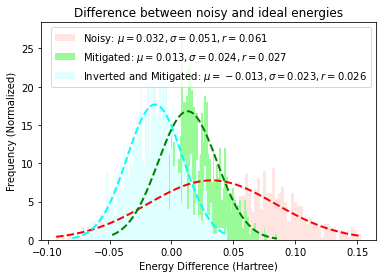

In [15]:
colors = ['mistyrose', 'red', 'palegreen', 'green', 'lightcyan', 'cyan']
plotter(diff_r,diff_nr,diff_inr, colors , 'Regular_Full.png')

# Without Readout